# k_means_example.py

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


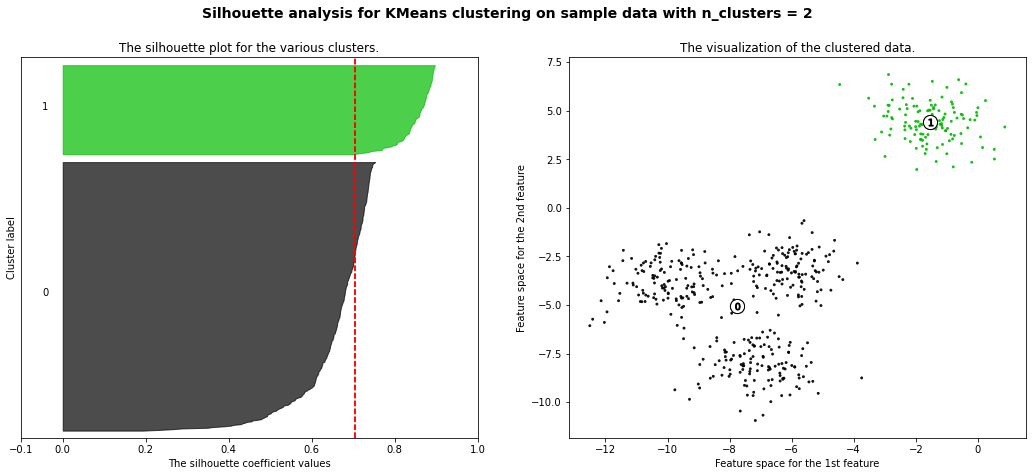

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


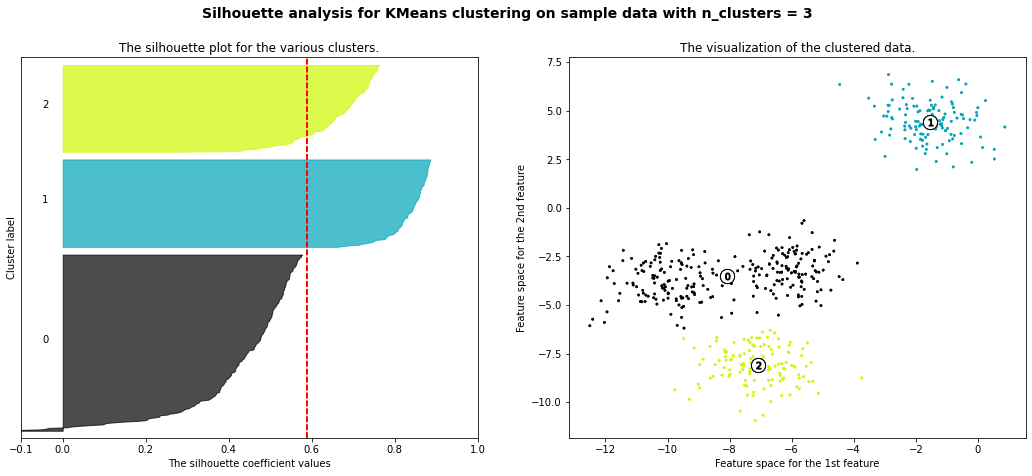

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


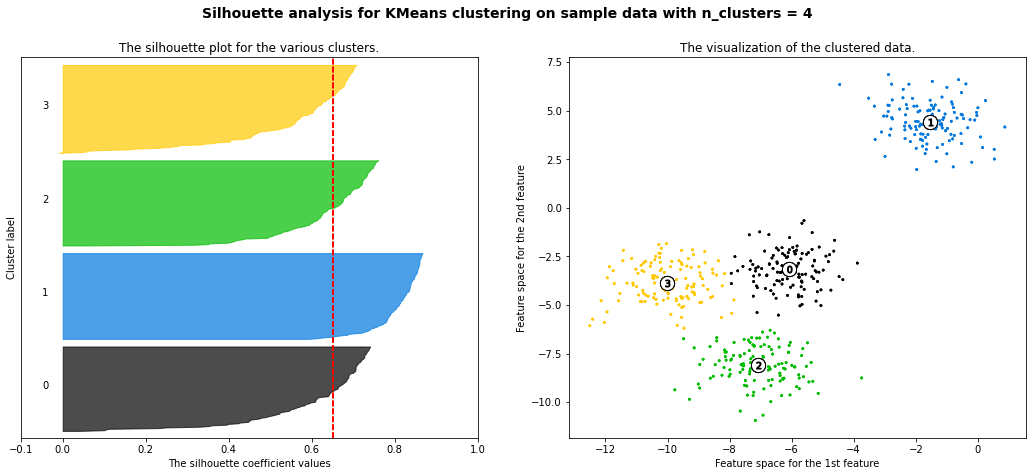

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


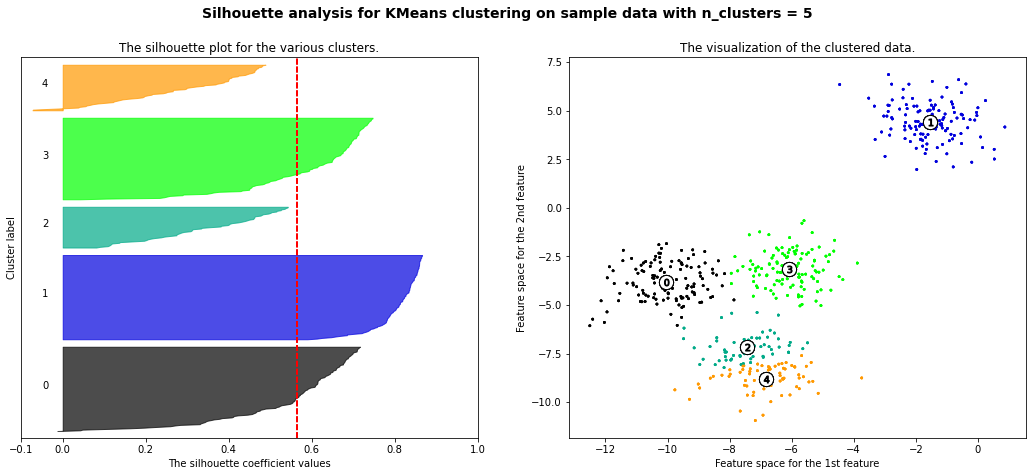

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


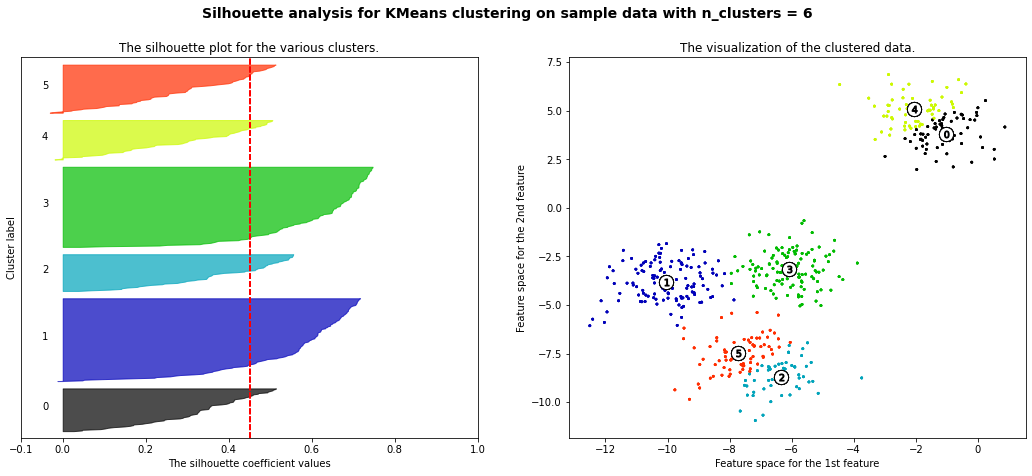

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has 500 data records, 2 features and 4 clusters. For more details:

# https://scikitlearn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  shuffle=True,
                  random_state=1)  # For reproducibility # constant random_state means it is not real random

# To find out the optimal number of clusters we can search through range of clusters.

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    # but in this example code all lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # # The (n_clusters+1)*10 is for inserting blank space between
    # silhouette plots of individual clusters, to demarcate them
    # clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random
    # generator seed of 10 for reproducibility.
    # constant random_state means it is not real random

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the
    # samples.This gives a perspective into the density and
    # separation of the formed clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the
        # middle

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the
        # values

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0],
                    X[:, 1],
                    marker='.',
                    s=30,
                    lw=0,
                    alpha=0.7,
                    c=colors,
                    edgecolor='k')

        # Labeling the clusters by centers
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0],
                    centers[:, 1],
                    marker='o',
                    c="white",
                    alpha=1,
                    s=200,
                    edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0],
                        c[1],
                        marker='$%d$' % i,
                        alpha=1,
                        s=50,
                        edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                     fontsize=14,
                     fontweight='bold')

    plt.show()


# k_means.py

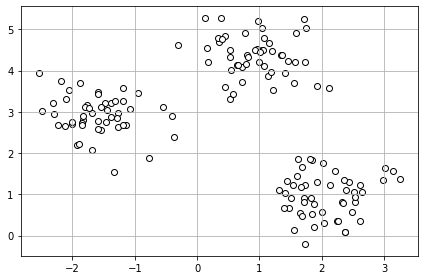

[ 0.9329651   2.06521743 -1.5947298 ]
[4.35420712 0.96137409 2.92236966]


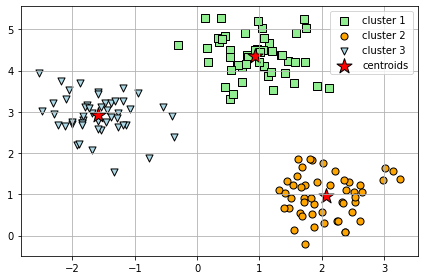

Distortion: 72.48


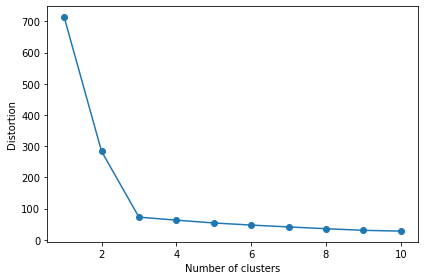

For n_clusters = 3 The average silhouette_score is : 0.7143417887288687


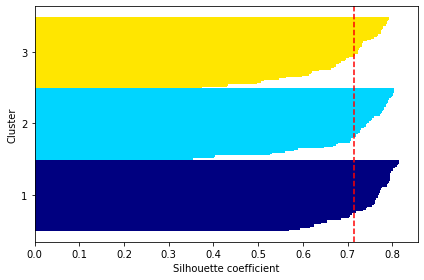

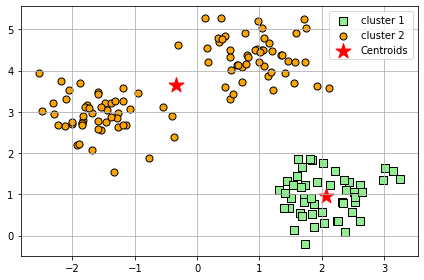

For n_clusters = 2 The average silhouette_score is : 0.5848706144251782


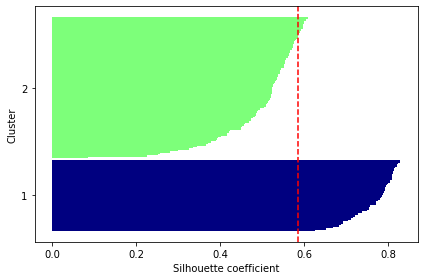

In [2]:
# KMeans module from sklean is used to perform the clustering.
# Go to https://scikitlearn.org/stable/modules/generated/sklearn.cluster.KMeans.html for more details.

from IPython.display import Image
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Create a sample data set using make_blobs. This particular
# dataset has 2 features and 3 clusters.
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
# Display the datset
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            # s=50 # s=(array.shape())
            )
plt.grid()
plt.tight_layout()
# Customize the path to save images
# plt.savefig('P:/COMP809/11_01.png', dpi=300)
plt.show()

"""
K-Means algorithm is used for identifying clusters in a given dataset. 
For this learning sake, 
let’s assume that we have 2 independent variables 
(plotted on X & Y). Each point of the dependent variable is plotted on graph.

Step 1 :- Decide on number of cluster you want. For this e.g, let’s take K = 2

Step 2 :- Based on the chosen cluster, identify the points as center points. 
          In this case, identify any 2 points on the graph and mark them as center points (C1, C2).
          
Step 3 :- Now, for each data point, classify them into 1st or 2nd cluster based on the closest point. 
          For e.g, a point of (2,5) may be closest to center C1 than to center C2. 
          In this case, point (2,5) will be marked into a cluster which has a center point as C1.
          
Step 4 :- After classifying all data points into C1 or C2, 
          now you will have few points which are close to C1 and rest are close to C2. 
          Based on these points, calculate new center point for data points which were in C1 group. 
          So, C1 will move to a new point. The same will happen to C2.
          
Step 5 :- Repeat Step 3, Step 4 until a point is reached where C1 & C2 don’t move any further!
"""
# Apply k-means clustering with 3 centroids
km = KMeans(n_clusters=3,
            init='random',  # k++ means
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

# We set n_init=10 to run the k-means clustering algorithms 10
# times independently with different random centroids to choose
# the final model as the one with the lowest SSE.

"""
What is random initialization trap?
Sometimes it’s quite possible that, 
we might be choosing a initial K center points in such a way that the algorithm gives a false positive model. 
This can be avoided using K++ means.
 https://www.geeksforgeeks.org/ml-random-intialization-trap-in-k-means/
 
  K-Means is an iterative clustering method which
   randomly assigns initial centroids and shifts them to minimize the sum of squares.
    One problem is that, 
    because the centroids are initially random, 
    a bad starting position could cause the algorithm to converge at a local optimum.

   K-Means++ was designed to combat this - 
    It chooses the initial centroids using a 
    weighted method which makes it more likely 
    that points further away will be chosen as the initial centroids. 
    The idea is that while initialization is more complex and will take longer, 
    the centroids will be more accurate and thus fewer iterations are needed, 
    hence it will reduce overall time.
"""

"""
Within Cluster Sum of Squares. For e.g, 
let’s take there are 3 clusters. 
That means, we have 3 center points (C1, C2, C3).
Each data point falls into the zone of either C1 or C2 or C3.
First we calculate the sum of squares of the distance of each 
data point in cluster 1 from their center point C1. 
Let’s say there are 3 points in cluster 1 (c1p1, c1p2, c1p3).
[dist(C1, c1p1) ]² + [dist(C1, c1p2)]² + [dist(C1, c1p3)]². 
 This is cluster 1 sum of squares.
 
Similarly we do the same for C2 & C3. Now, we add the sum of all 3 ‘clusters sum of squares’ to get WCSS.
"""

# Predicting cluster labels
y_km = km.fit_predict(X)

cluster_1 = y_km == 0  # 0 is the first cluster
# False  True  True  True False ...
# Visualize the clusters identified(using y_km)together with cluster labels.
plt.scatter(X[cluster_1, 0],
            X[cluster_1, 1],
            s=50,
            c='lightgreen',
            marker='s',
            edgecolor='black',
            label='cluster 1'
            )

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            edgecolor='black',
            label='cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            edgecolor='black',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            edgecolor='black',
            label='centroids'
            )
print(km.cluster_centers_[:, 0])
print(km.cluster_centers_[:, 1])

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
# plt.savefig('P:/COMP809/11_02.png', dpi=300)
plt.show()

# Calculating Distortion
print('Distortion: %.2f' % km.inertia_)
distortions = []

"""

# Observing the behaviour of the distortion with the number of clusters.
# Using elbow method to find optimum number of clusters

How to choose the right number of clusters? Elbow method? 
 || (Why you don't want to classify it into 150 clusters ?)

WCSS always decreases with the increase in the number of clusters. 
However, it should be noted that, 
the rate of drop in WCSS starts to drop as we increase the number of clusters. 
This would be our hint.
We need to stop at the number of clusters from where the rate of drop in
WCSS doesn’t drop substantially (in other words, the rate of drop is very less). 
This is sometimes also termed as Elbow method.
"""

for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
# plt.savefig('P:/COMP809/11_03.png', dpi=300)
plt.show()

# Quantifying the quality of clustering via silhouette plots.
# k-means++ gives better clustering/performance than classic
# approach(init=’random’). Always recommended to use k-means++

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

# Silhouette Measure/plots for cluster evaluation.
# Higher the score better the clustering.

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_avg = silhouette_score(X, y_km)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
# plt.savefig('P:/COMP809/11_04.png', dpi=300)
plt.show()

# Comparison to "bad" clustering:Same data samples are clustered using 2 clusters.
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:,
            1],
            s=250,
            marker='*',
            c='red',
            label='Centroids')

plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('P:/COMP809/11_05.png', dpi=300)
plt.show()

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_avg = silhouette_score(X, y_km)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# all the plots are more or less of similar
# thickness and hence are of similar sizes
# https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0,
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
# plt.savefig('P:/COMP809/11_06.png', dpi=300)
plt.show()
